In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df_iklan = pd.read_csv('advertising.csv')
df_iklan.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df_iklan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [15]:
# ubah format tanggal TimeStamp
pd.to_datetime(df_iklan['TimeStamp'], format='%Y-%m-%d')

# ekstrak 'hour', 'month', dan 'day of week' pada kolom 'TimeStamp'
df_iklan['Hours'] = df_iklan['TimeStamp'].apply(lambda time: time.hour)
df_iklan['Month'] = df_iklan['TimeStamp'].apply(lambda time: time.month)
df_iklan['Day Of Week'] = df_iklan['TimeStamp'].apply(lambda time: time.dayofweek)

In [16]:
df_iklan

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,TimeStamp,Hours,Month,Day Of Week
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27 00:53:11,0,3,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04 01:39:02,1,4,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13 20:35:42,20,3,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10 02:31:19,2,1,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03 03:36:18,3,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,2016-02-11 21:49:00,21,2,3
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2016-04-22 02:07:01,2,4,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,2016-02-01 17:24:57,17,2,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2016-03-24 02:35:54,2,3,3


In [33]:
df_timestamp = df_iklan.copy()

# Exploration Data Analysis

In [35]:
# mapping 'Month'
df_timestamp['Month'] = df_timestamp['Month'].map({0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'Mei',5:'Jun',6:'Jul',
                                                  7:'Ags',8:'Sep',9:'Okt',10:'Nov',11:'Des'})

In [37]:
# mapping 'Day of Week'
df_timestamp['Day Of Week'] = df_timestamp['Day Of Week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Age'>

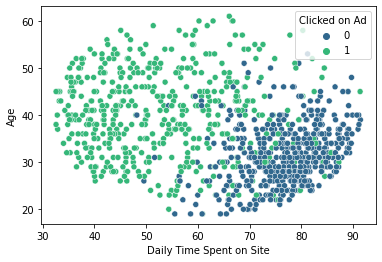

In [41]:
# scatter plot 'Daily time spent on Site' vs 'Age'
sns.scatterplot(x='Daily Time Spent on Site', y='Age', data=df_timestamp, hue='Clicked on Ad', palette='viridis')

Pelanggan yang berumur 38 - 60 tahun tertarik klik iklan dengan waktu yang dihabiskan dalam website sekitar 35 - 55 menit

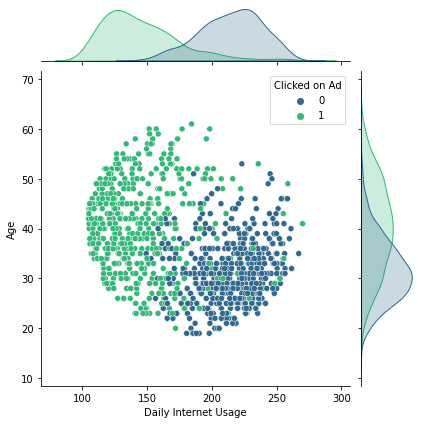

In [58]:
# scatterplot 
sns.jointplot(x='Daily Internet Usage', y='Age', data=df_timestamp, hue='Clicked on Ad', palette='viridis')

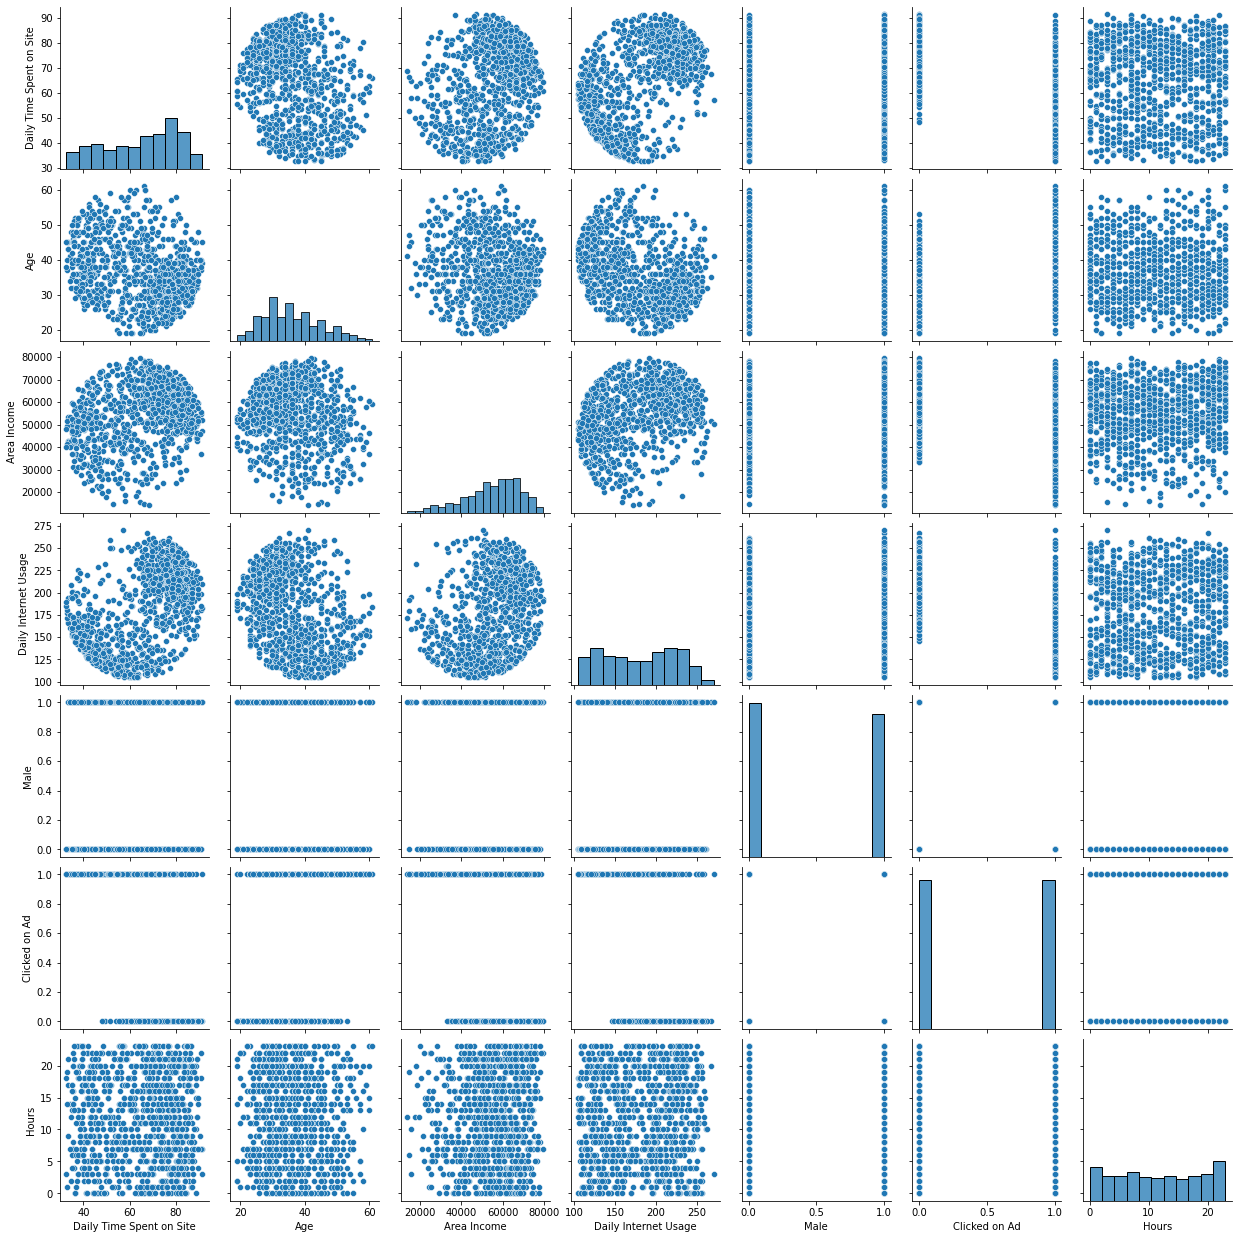

In [57]:
sns.pairplot(df_timestamp)

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

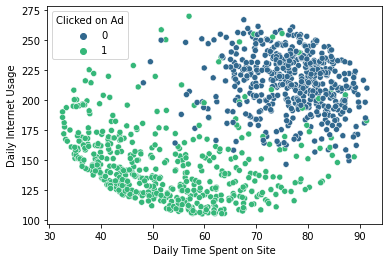

In [61]:
# scatterplot 'Daily Time Spent on Site' vs 'Daily Internet Usage'
sns.scatterplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df_timestamp, 
                hue='Clicked on Ad', palette='viridis')

<AxesSubplot:xlabel='Area Income', ylabel='Daily Internet Usage'>

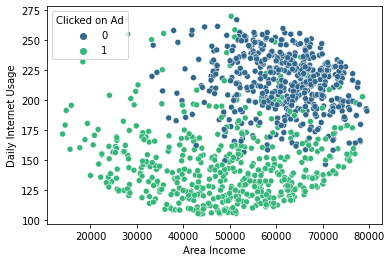

In [62]:
sns.scatterplot(x='Area Income', y='Daily Internet Usage', data=df_timestamp, 
                hue='Clicked on Ad', palette='viridis')

<AxesSubplot:>

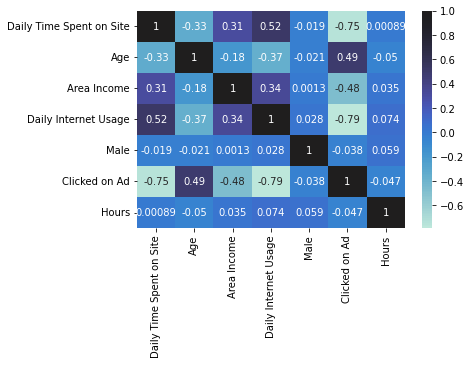

In [65]:
# heatmap correlasi pearson
sns.heatmap(df_timestamp.corr(),annot=True, center=True)

## Feature Engineering
Dalam data ini tidak ada *missing value*. 
Ada kolom yang perlu dihapus seperti 'Ad Topic Line','City','Country','Timestamp'. Topik line, city dan country dihapus untuk mempersingkat analisis, karena jika di jadikan dummies perlu pendekatan dan pengetahuan umum untuk mengelompokan data. Sehingga, untuk saat ini tidak perlu. Timestamp karena data sudah diekstrak, jika tetap digunakan akan memengaruhi multiko. 

In [84]:
df_fe = df_timestamp.copy()

In [85]:
df_fe.drop(['Ad Topic Line', 'City', 'Country', 'TimeStamp','Timestamp'],inplace=True, axis=1)

In [86]:
df_fe.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hours,Month,Day Of Week
0,68.95,35,61833.90,256.09,0,0,0,Apr,Sun
1,80.23,31,68441.85,193.77,1,0,1,Mei,Mon
2,69.47,26,59785.94,236.50,0,0,20,Apr,Sun
3,74.15,29,54806.18,245.89,1,0,2,Feb,Sun
4,68.37,35,73889.99,225.58,0,0,3,Jul,Fri


In [106]:
# buat variabel dummie untuk kolom 'month', dan 'Day of Week'. Jika jenis data sudah objek maka variabel dummi
# secara otomatis terbentuk dengan pd.get_dummies(). Kolom pertama harus didrop untuk mencegah multiko
# 0 = bulan lainnya, 1 ada satu bulan yang sesuai objek
Month = pd.get_dummies(df_fe['Month'],drop_first=True)
Month

,Apr,Feb,Jul,Jun,Mar,Mei
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
5,0,0,0,1,0,0
6,0,1,0,0,0,0
7,1,0,0,0,0,0
8,0,0,0,0,0,1
9,0,0,0,0,0,0


In [90]:
# Dummy kolom day
# 0 hari lainnya, 1 terdapat satu nilai pada objek yang ditarget
DayOfWeek = pd.get_dummies(df_fe['Day Of Week'], drop_first=True)
DayOfWeek

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


In [97]:
# Jika diperhatikan maka ada terdapat banyak kolom baru jika dimasukan dalam dataframe df_fe. 
# hal ini boleh saja namun terdapat pemborosan pada volume data. Sehingga perlu dikelompokan
# untuk mengurangi volme data set. 

0      0
1      1
2      0
3      0
4      0
5      0
6      0
7      1
8      1
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     1
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     0
26     1
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     1
44     0
45     0
46     0
47     0
48     0
49     1
50     1
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     1
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [113]:
# Kelompok_Bulan_Pertama = feb,mar,apr
# Kelompok_bulan_keduai = mei,jun,jul
group_month1 = Month[['Feb','Mar','Apr']].max(axis=1)
group_month2 = Month[['Mei','Jun','Jul']].max(axis=1)

In [120]:
DayOfWeek.columns.values

array(['Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype=object)

In [121]:
# kelompok_hari_pertama = Mon, Tue, Wed
# kelompok_hari_kedua = Thu, Sat, Sun
group_day1 = DayOfWeek[['Mon', 'Tue','Wed']].max(axis=1)
group_day2 = DayOfWeek[['Thu','Sat','Sun']].max(axis=1)

In [123]:
# Oke, semua sudah beres. Selanjutnya tinggal mengganbungkan kelompok ke dalam DataFraame
df_fe = pd.concat([df_fe,group_month1,group_month2,group_day1,group_day2], axis=1)

In [126]:
df_fe.columns.values

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Hours', 'Month',
       'Day Of Week', 0, 1, 2, 3], dtype=object)

In [127]:
colomns = ['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Hours', 'Month',
       'Day Of Week', 'GroupMonth1','GroupMonth2','GroupDay1','GroupDay2']

df_fe.columns = colomns

In [131]:
# Tahapan FE hampir selesai. Hapus kolom yang sudah tidak digunakan
df_fe.drop(['Day Of Week','Month'],axis=1,inplace=True)
df_fe.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hours,GroupMonth1,GroupMonth2,GroupDay1,GroupDay2
0,68.95,35,61833.90,256.09,0,0,0,1,0,0,1
1,80.23,31,68441.85,193.77,1,0,1,0,1,1,0
2,69.47,26,59785.94,236.50,0,0,20,1,0,0,1
3,74.15,29,54806.18,245.89,1,0,2,1,0,0,1
4,68.37,35,73889.99,225.58,0,0,3,0,1,0,0


## Logistic Regression Model

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [134]:
df_lr = df_fe.copy()

In [135]:
X = df_lr.drop(['Clicked on Ad'], axis=1)
y = df_lr['Clicked on Ad']

X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=210,test_size=0.3)

In [139]:
lr = LogisticRegression().fit(X_train,y_train)

In [140]:
predict = lr.predict(X_train)

In [143]:
from sklearn import metrics
print("Akurasi Data Latih :", metrics.accuracy_score(y_train, lr.predict(X_train)))
print("Akurasi Data Uji :", metrics.accuracy_score(y_test, lr.predict(X_test)))
print("AUC Data Latih :", metrics.roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]))
print("AUC Data Uji :", metrics.roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print("Confussion Metrics Latih :", metrics.confusion_matrix(y_train, lr.predict(X_train)))
print("Confussion Metrics Uji :", metrics.confusion_matrix(y_test, lr.predict(X_test)))
print("Laporan Klasifikasi Latih :", metrics.classification_report(y_train, lr.predict(X_train)))
print("Laporan Klasifikasi Uji :", metrics.classification_report(y_test, lr.predict(X_test)))

Akurasi Data Latih : 0.9014285714285715
Akurasi Data Uji : 0.9133333333333333
AUC Data Latih : 0.9576921820379626
AUC Data Uji : 0.9669281511855945
Confussion Metrics Latih : [[334  24]
 [ 45 297]]
Confussion Metrics Uji : [[134   8]
 [ 18 140]]
Laporan Klasifikasi Latih :               precision    recall  f1-score   support

           0       0.88      0.93      0.91       358
           1       0.93      0.87      0.90       342

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

Laporan Klasifikasi Uji :               precision    recall  f1-score   support

           0       0.88      0.94      0.91       142
           1       0.95      0.89      0.92       158

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



In [153]:
X_train.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Hours', 'GroupMonth1', 'GroupMonth2',
       'GroupDay1', 'GroupDay2'],
      dtype='object')

In [151]:
df_ceof = pd.DataFrame(lr.coef_)

In [154]:
columns = ['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Hours', 'GroupMonth1', 'GroupMonth2',
       'GroupDay1', 'GroupDay2']
df_ceof.columns = columns

In [155]:
df_ceof

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hours,GroupMonth1,GroupMonth2,GroupDay1,GroupDay2
0,-0.06045,0.260047,-0.000019,-0.026313,0.001605,0.047829,0.002277,0.001739,0.001026,0.003608


In [156]:
np.exp(df_ceof['Male'])

0    1.001606
Name: Male, dtype: float64

In [157]:
np.exp(df_ceof['GroupDay1'])

0    1.001027
Name: GroupDay1, dtype: float64

In [158]:
np.exp(df_ceof['GroupDay2'])

0    1.003615
Name: GroupDay2, dtype: float64

In [159]:
np.exp(df_ceof['GroupMonth1'])

0    1.00228
Name: GroupMonth1, dtype: float64

In [160]:
np.exp(df_ceof['GroupMonth2'])

0    1.001741
Name: GroupMonth2, dtype: float64

- odds(male) peluang seorang laki - laki untuk klik iklan sebesar 1.002 dibandingkan perempuan 
- odds(GroupDay1) peluang hari dalam kelompok iklan pertama akan klik iklan sebesar 1.001 dibandigkan dengan kelompok hari lainnya.
- odds(GroupDay2) peluang hari dalam kelompok iklan kedua akan melakukan klik iklan sebesar 1.004 dibandingkan dengan kelompok hari lainnya.
- odds(GroupMonth1) peluang seseorang dapat klik iklan dalam kelompok bulan pertama sebesar 1.002 dibandingkan dengan bulan lainnya
- odds(GroupMonth2) peluang seorang yang masuk dalam kelompok bulan kedua sebesar 1.002 untuk mengklik iklan dibandingkan dengan bulan lainnya. 